In [3]:
import numpy as ny
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


In [4]:
data_path="G:\project\Bank_Personal_Loan_Modelling.csv"
df_loan=pd.read_csv(data_path)
df_loan

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [5]:
df_loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
df_loan.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [7]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
df_loan[df_loan['Experience']<0]['Age'].describe()

count    52.000000
mean     24.519231
std       1.475159
min      23.000000
25%      24.000000
50%      24.000000
75%      25.000000
max      29.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Correlation Heatmap')

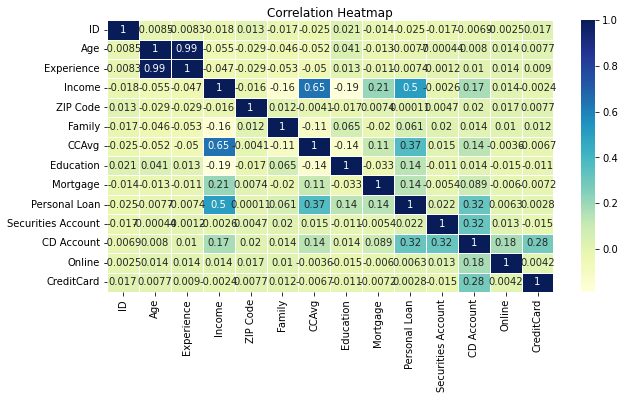

In [9]:
plt.figure(figsize=(10,5))
heatmap = sns.heatmap(df_loan.corr(), annot=True, cmap='YlGnBu',linewidths=0.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=2)

([<matplotlib.patches.Wedge at 0x1cec4a50bb0>,
 [Text(-1.050350983068654, 0.3267457916587637, ''),
  Text(1.0503509677725784, -0.32674584082924163, '')],
 [Text(-0.5729187180374475, 0.17822497726841657, '90.4%'),
  Text(0.5729187096941336, -0.17822500408867725, '9.6%')])

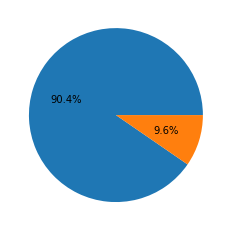

In [10]:
plt.pie(data=df_loan,x=df_loan["Personal Loan"].value_counts(),autopct='%1.1f%%')

In [20]:
def modelling(df_loan):
    
    x = df_loan[['Age','Experience','Income','Family']]
    y = df_loan['Personal Loan']
    x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x, y, test_size=0.3, random_state=42) 
    
    tree = DecisionTreeClassifier()
    tree.fit(x_train_new, y_train_new)
    
    pred_new = tree.predict(x_test_new)
    
    acc_new = tree.score(x_test_new, y_test_new)
    a = mean_absolute_error(y_test_new, pred_new)
    print("Acurray on test set: {:.2f}%".format(acc_new*100))
    print("mean_absolute_error of the test set: {:.2f}".format(a))
    return( x_train_new, x_test_new, y_train_new, y_test_new)


In [21]:
modelling(df_loan)

Acurray on test set: 93.47%
mean_absolute_error of the test set: 0.07


(      Age  Experience  Income  Family
 1840   55          25      23       4
 2115   57          31      30       3
 4437   63          38      63       2
 1146   31           7      71       1
 2486   61          36     130       1
 ...   ...         ...     ...     ...
 4426   33           8     140       1
 466    25           0      13       2
 3092   43          18     113       2
 3772   35          10     152       2
 860    57          31      30       2
 
 [3500 rows x 4 columns],
       Age  Experience  Income  Family
 1501   30           4      35       2
 2586   47          23     149       4
 2653   30           5     121       2
 1055   31           6      62       1
 705    62          36      30       3
 ...   ...         ...     ...     ...
 3563   53          27     139       1
 1538   55          30      34       4
 1837   43          18     103       3
 2380   40          16      50       2
 1912   42          16     191       3
 
 [1500 rows x 4 columns],
 1840   

In [22]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
a,b,c,d=modelling(df_loan)
# Initiatlize the model
logreg = LogisticRegression(solver='liblinear', random_state = 0)
logreg.fit(a,c)
y_pred_test = logreg.predict(b)
mean_absolute_error(d,y_pred_test )

Acurray on test set: 93.53%
mean_absolute_error of the test set: 0.06


0.08333333333333333